In [47]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [49]:
imPth = r'cat.jpg'
im = plt.imread(imPth)

In [51]:
imGray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)

# blurring

In [73]:
smoothingMask = np.ones((5,5))/255 # to get more blurring use a large mask or repeat the mask on blurred images over and over

In [75]:
imBlurred = signal.convolve2d(imGray,smoothingMask,boundary='symm',mode='same') # applying mask to image

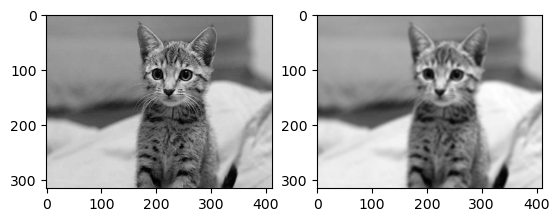

In [77]:
plt.subplot(121)
plt.imshow(imGray,cmap='gray')
plt.subplot(122)
plt.imshow(imBlurred,cmap='gray')

In [81]:
xMask = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) # vertical mask
yMask = xMask.T.copy() 

In [83]:
fx = signal.convolve2d(imGray,xMask,boundary = 'symm',mode='same')
fy = signal.convolve2d(imGray,yMask,boundary = 'symm',mode='same')

In [85]:
fx.shape

(316, 411)

In [87]:
imGray.shape

(316, 411)

In [131]:
Gm = (fx**2 + fy**2)**0.5 # gradient magnitude

In [133]:
Gm

array([[10.63014581, 14.4222051 ,  8.06225775, ..., 24.18677324,
        24.18677324,  4.24264069],
       [19.31320792, 22.36067977, 22.20360331, ..., 25.55386468,
        28.3019434 , 15.29705854],
       [23.76972865, 26.92582404, 28.28427125, ..., 25.49509757,
        33.9411255 , 24.18677324],
       ...,
       [ 6.        ,  6.        ,  6.        , ..., 10.81665383,
         9.        ,  3.        ],
       [ 9.        ,  9.        ,  9.        , ...,  4.24264069,
         9.        ,  3.        ],
       [ 3.        ,  3.        ,  3.        , ...,  0.        ,
         9.        ,  3.        ]])

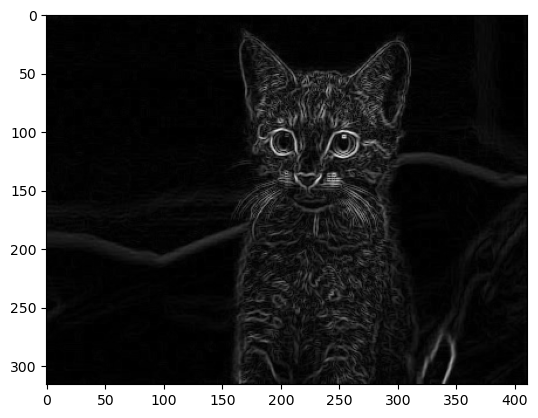

In [91]:
plt.imshow(Gm,cmap='gray')

In [93]:
th = Gm.max()-2*Gm.std() # setting a threshold 

In [95]:
th

548.8751585802829

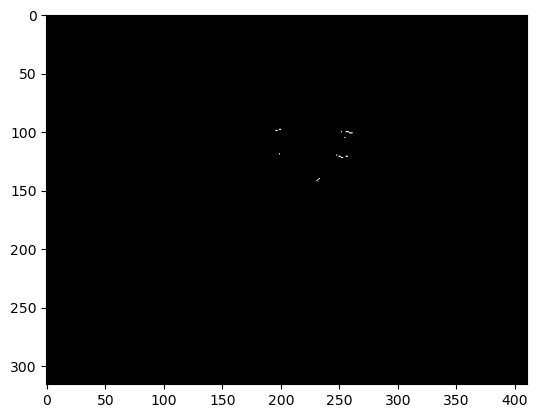

In [135]:
E = Gm>th
plt.imshow(E,cmap='gray')

# image sharpening

In [161]:
imSharp = imBlurred + 0.035*Gm

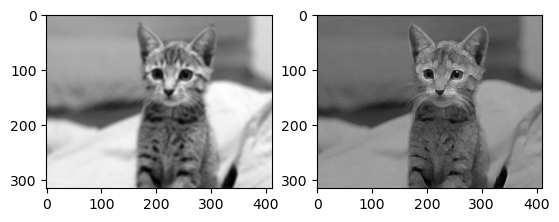

In [163]:
plt.subplot(121)
plt.imshow(imBlurred,cmap='gray')
plt.subplot(122)
plt.imshow(imSharp,cmap='gray')